### Sentiment Analysis or Opinion Mining

Process of understanding the opinion of author about the subject

#### Sentiment Analysis System

1. Opinion or Polarity - Positive, Neutral or Negative
2. Emotion - Joy, Surprise, Anger, Disgust
3. Subject of Discussion - What is being talked about
4. Opinion Holder or Entity - By whom?

#### Why Sentiment Analysis

1. Social Media Monitoring - Not only what people are talking, but how they are talking about it in forums, post, blogs and news.
2. Brand Monitoring
3. Customer Service
4. Product Analysis
5. Market Research and Analysis

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB_sample.csv')

In [3]:
data.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [ ]:
data.shape

In [4]:

data.columns

Index(['Unnamed: 0', 'review', 'label'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


In [7]:
data.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [8]:
data.label.value_counts() / len(data)

0    0.504199
1    0.495801
Name: label, dtype: float64

In [9]:
length_reviews = data.review.str.len()

In [10]:
max(length_reviews)

10321

In [11]:
min(length_reviews)

52

#### Level of Granularity(level of detail)

1. Document Level(Blog, News)
2. Sentence Level(Sentence, Small Feedback)
3. Aspect Level(Opinions about multiple features)

#### Algorithms for Sentiment Analysis

1. Rule/ Lexicon Based - Contains a list of words with Balanced score
2. Automated Systems based on Machine Learning - A classification problem

#### Valance - 
A score

#### Subjectivity -
The quality of being based on or influenced by personal feelings, tastes, or opinions. Measured from 0 to 1. 0 being Objective, while 1 being Subjective.

#### Polarity - 
Measured between -1 and 1. -1 being very negative, 0 being neutral and 1 being positive.

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
my_valance = TextBlob("Today was a good day!")

In [15]:
my_valance.polarity

0.875

In [16]:
my_valance.subjectivity

0.6000000000000001

In [17]:
my_valance.pos_tags

[('Today', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('good', 'JJ'), ('day', 'NN')]

In [18]:
my_valance.detect_language()

'en'

In [19]:
my_valance.sentiment

Sentiment(polarity=0.875, subjectivity=0.6000000000000001)

### Automated Machine Learning Approach
1. Rely on labelled Historical data.
2. Might take a while to train
3. Latest Machine Learning Models can be quite powerful.


### Rule/ Lexicon Based Approach
1. Rely on Manually crafted valance score
2. Different words might have different polarity in different context, which may make predictions opposite to what it actually is.
3. Can be quite fast.

#### Word Cloud Algorithm
Pictorial Representation of Words where the size is based on frequency of words. More frequent a word is, bigger and bolder it will appear on the word cloud.

##### Pros 
1. Can reveal the essential
2. Provide an overall sense of the text.
3. Easy to grasp and engaging.

##### Cons
1. Sometimes confusing and uninformative.
2. With larger text, require more work.

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
two_cities = "It was the best of times, it was the worst of times,\
it was the age of wisdom, it was the age of foolishness,\
it was the epoch of belief, it was the epoch of incredulity,\
it was the season of Light, it was the season of Darkness,\
it was the spring of hope, it was the winter of despair,\
we had everything before us, we had nothing before us,\
we were all going direct to Heaven, we were all going,\
direct the other way - in short, the period was so far\
like the present period, that some of its noisiest\
authorities insisted on its being recieved, for good\
or for evil, in the superlative degree of comparison only."

In [3]:
cloud_two_cities = WordCloud().generate(two_cities)

In [4]:
cloud_two_cities

(-0.5, 399.5, 199.5, -0.5)

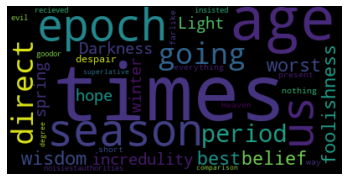

In [5]:
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
review_array = data.review.values
new_list = []
for i in review_array:
    new_list.append(i)
    
text = ""
for string in new_list:
    text += " " + string

In [27]:
text[:100]

' This short spoof can be found on Elite\'s Millennium Edition DVD of "Night of the Living Dead". Good'

In [28]:
tokens = [token for token in word_tokenize(text.lower()) if token.isalpha()]

In [29]:
tokens[:10]

['this',
 'short',
 'spoof',
 'can',
 'be',
 'found',
 'on',
 'elite',
 'millennium',
 'edition']

In [30]:
new_data = [word for word in tokens if word not in stopwords.words('english')]

In [31]:
new_data[:10]

['short',
 'spoof',
 'found',
 'elite',
 'millennium',
 'edition',
 'dvd',
 'night',
 'living',
 'dead']

In [32]:
text = ""
for word in new_data:
    text += " " + word

In [33]:
text[:100]

' short spoof found elite millennium edition dvd night living dead good thing would never went even t'

In [34]:
cloud_imdb = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

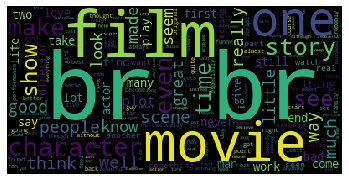

In [35]:
plt.imshow(cloud_imdb)
plt.axis('off')

### Bag of Words  

1. Describes the occurence of words within a document or a collection of documents(corpus)
2. Builds a vocabulary of the words and measure of their presence.

In [36]:
amazon = pd.read_csv('amazon_reviews_sample.csv')

In [37]:
amazon.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [38]:
amazon.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vect = CountVectorizer(max_features=1000)
vect.fit(amazon.review)
X = vect.transform(amazon.review)

In [41]:
X

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 406668 stored elements in Compressed Sparse Row format>

In [42]:
import numpy as np

In [43]:
my_array = X.toarray()

In [44]:
my_array

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())

In [46]:
X_df.head()

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0







#### Remember that context matters!

*I am happy, not sad*

*I am sad, not happy*

Putting 'not' in front of word(negation) is one example of how context matters.
Bag of Words will be same for both of the sentences.

### Capturing Context with Bag of Words

1. Unigrams - single tokens
2. Bigrams - pairs of tokens
3. Trigrams - triplets of tokens
4. n-grams - sequence of n-tokens

For example,
*The weather today is wonderful*

1. Unigrams: {The, weather, today, is, wonderful}
2. Bigrams: {The weather, weather today, today is, is wonderful}
3. Trigrams: {The weather today, weather today is, today is wonderful}

In [ ]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(amazon.review)
X_r = vect.transform(amazon.review)

In [48]:
X_review = pd.DataFrame(X_r.toarray(), columns=vect.get_feature_names())

MemoryError: 

In [ ]:
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(amazon.review)
X_review = vect.transform(amazon.review)

In [ ]:
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

In [ ]:
X_df.head()

In [ ]:
from nltk.tokenize import word_tokenize
word_tokens = [word_tokenize(review) for review in amazon.review]

In [ ]:
len_tokens = []
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [ ]:
amazon['n_tokens'] = len_tokens

In [ ]:
amazon.head()

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect_langs

In [ ]:
foreign = "Este libro ha sido uno de los mehores libros que he leido"

In [ ]:
detect_langs(foreign)

In [ ]:
len(amazon)

In [ ]:
languages = []
for row in range(len(amazon)):
    languages.append(detect_langs(amazon.iloc[row, 1]))

In [ ]:
languages = [str(lang).split(':')[0][1:] for lang in languages]

In [ ]:
amazon['Languages'] = languages

In [ ]:
amazon.head()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "films", "watch", "see", "think", "br", "time", "one", "character", "story", "show", "made", "make", "even"])

In [ ]:
my_cloud = WordCloud(stopwords=my_stopwords).generate(text)
plt.imshow(my_cloud, interpolation='bilinear')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [ ]:
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre'])

In [ ]:
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(amazon.review)
X = vect.transform(amazon.review)

#### Stemming

Stemming is the process of transforming words to their root forms, even if the stem itself is not a valid word in the language.

1. Produces roots of words
2. Fast and effecient to compute

#### Lemmatization

Lemmatization is quite similar to stemming but unlike, it reduces the words to roots that are valid words in the language.

1. Produces actual words
2. Slower than stemming and can depend on the part-of-speech

In [ ]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

Snowball stemmer is used for Foreign Languages

*from nltk.stem.snowball import SnowballStemmer*

*DutchStemmer = SnowballStemmer("dutch")*

*DutchStemmer.stem("beginen")*

Outputs:
*Begin*

In [ ]:
porter.stem("wonderful")

In [ ]:
porter.stem("Today is a wonderful day!")

In [ ]:
stemmed = [porter.stem(word) for word in word_tokenize("Today is a wonderful day!")]

In [ ]:
stemmed

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
WNLemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

In [ ]:
WNLemmatizer.lemmatize('wonderful', pos='a')

### TF-IDF

#### TF: Term Frequency:
How often a given word appears within a document in the corpus

#### IDF: Inverse Document Frequency:
Log-ratio between the total number of documents and the 
number of documents that contain a specific word

Used to calculate the weight of words that do not occur frequently.

#### TFIDF Score:
*tfidf = term frequency * inverse document frequency*

1. *BOW does not account for length of a document, tfidf does*
2. *tfidf likely to capture words common within a document but not across documents*
3. *Since it penalizes the frequent words, less need to deal with stop words explicitly*
4. *Quite useful in search queries and information retrieval to rank the relevance of returned results*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(max_features=100).fit(amazon.review)

In [ ]:
X = vect.transform(amazon.review)

In [ ]:
X_tfidf = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_tfidf.head()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
vect = TfidfVectorizer(max_features=100).fit(data.review)
X_imdb_tfidf = vect.transform(data.review)
X_imdb = pd.DataFrame(X_imdb_tfidf.toarray(), columns=vect.get_feature_names())

In [ ]:
X, y = X_imdb, data.label.values

In [ ]:
log_reg = LogisticRegression().fit(X, y)

In [ ]:
log_reg.score(X, y)